In [1]:
# #Mount your drive
# from google.colab import drive
# drive.mount('/content/drive')

# Code

1.  Apply tSNE to MNIST using any library that you want (not from scratch.)
2.  Plot the result.

In [2]:
#Code here
# Code here
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt
import urllib.request
from numpy.random import uniform
from sklearn.decomposition import PCA

In [3]:
def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)

    copied from http://deeplearning.net/ and revised by hchoi
    '''

    # Download the MNIST dataset if it is not present
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.
    print('... data has been loaded!')
    return train_set, valid_set, test_set

In [4]:
#Load the data into train, validation and test sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')

#Separate each set into image vector (_x) and label (_y)
train_x, train_y = train_set
val_x, val_y = val_set
test_x, test_y = test_set

print(train_x.shape)
print(train_y.shape)

Loading data...
... data has been loaded!
(50000, 784)
(50000,)


(50000, 2)


<ipython-input-5-154632fd1374>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(z[: , 0], z[: ,1], c=train_y, cmap=plt.cm.get_cmap('tab10', 10), s=5)


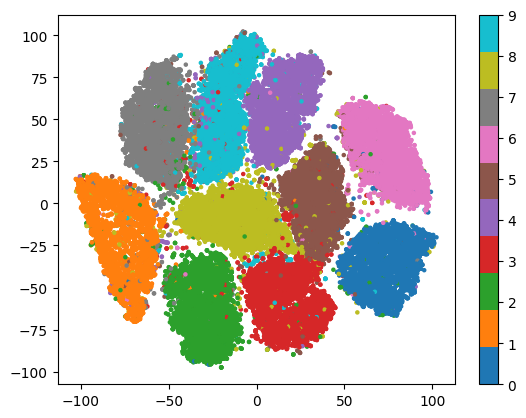

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state=123)
z = tsne.fit_transform(train_x)


print(z.shape)

plt.scatter(z[: , 0], z[: ,1], c=train_y, cmap=plt.cm.get_cmap('tab10', 10), s=5)
plt.colorbar()

plt.show()

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you provide the code to compute the tSNE for the MNIST dataset?
2.   (If not provided automatically in the previous prompt:) Can you plot the results?


**Paste the answer provided and run the code below:**

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


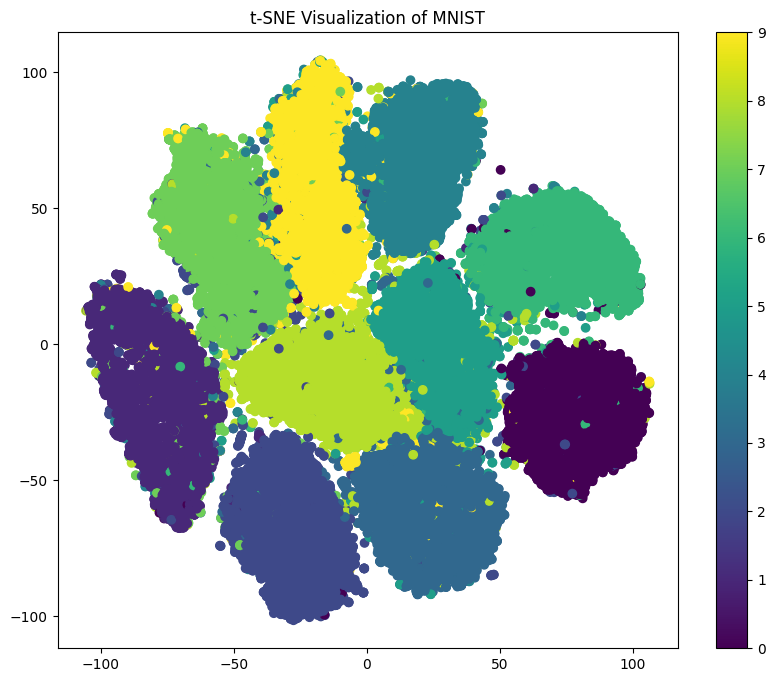

In [6]:
#paste the code here
# Import the necessary libraries
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target.astype(int)

# Create a t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit the model to the data and transform it to a lower-dimensional space
X_embedded = tsne.fit_transform(X)

# Visualize the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of MNIST')
plt.show()


# Report


1.   What are some differences you notice between your code and ChatGPT's? (Name at least 2)

  1. Using Dataset is different. I am using the MNIST dataset from 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'. However, ChatGPT extracts the MNIST dataset of ‘mnist_784’. Also, I used only data and labels of the train set, which has 50,000 elements, but ChatGPT’s code uses whole data and labels from the dataset.

  2. The value of a random state in the model’s hyperparameter is different. I arbitrarily used value 123, and ChatGPT used 42.


2.   Ask ChatGPT What are the advantages and disadvantages of using tSNE in a dataset. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a powerful technique for visualizing high-dimensional data in a lower-dimensional space. However, it has its advantages and disadvantages, which are important to consider when using t-SNE:

Advantages of t-SNE:

    Effective Dimensionality Reduction: t-SNE is particularly effective at reducing the dimensionality of high-dimensional data while preserving the local structure of the data. It can reveal clusters and patterns that are not immediately apparent in the original high-dimensional space.

    Visualization: t-SNE is widely used for data visualization. It can help you explore and understand the underlying structure of your data, making it easier to identify clusters, outliers, and relationships between data points.

    Non-linearity: Unlike some other dimensionality reduction techniques like PCA (Principal Component Analysis), t-SNE can capture non-linear relationships in the data. This makes it suitable for a wide range of datasets with complex structures.

    Robust to Noise: t-SNE is less sensitive to noise in the data compared to other techniques like PCA. It can often produce meaningful visualizations even in the presence of noisy or irregular data.

Disadvantages of t-SNE:

    Stochastic Nature: t-SNE is stochastic, meaning that different runs with the same data can produce different results. This can make it challenging to compare visualizations or results between runs. Setting a random seed can help with reproducibility.

    Computationally Intensive: t-SNE can be computationally intensive, especially for large datasets. The algorithm's complexity is O(n^2) in the number of data points, which can make it slow on very large datasets.

    Loss of Global Structure: While t-SNE is excellent at preserving local structures, it can sometimes distort the global structure of the data. Data points that are far apart in the high-dimensional space might appear closer together in the t-SNE visualization.

    Hyperparameter Tuning: t-SNE has hyperparameters, such as the perplexity and the learning rate, which can affect the results. Finding the right values for these hyperparameters can be challenging and might require some trial and error.

    Not Suitable for High-Dimensional Data: t-SNE is not ideal for very high-dimensional data, and it may require pre-processing (e.g., PCA) to reduce the dimensionality before applying t-SNE.

  In summary, t-SNE is a valuable tool for visualizing and exploring the structure of data, but it has limitations and should be used judiciously. It is often most effective when used as part of an exploratory data analysis process to gain insights into your data, rather than as a dimensionality reduction technique for machine learning models.

**My Answer**: As ChatGPT mentioned, t-SNE is a method for visualizing high-dimensional data at the location in a two or three-dimensional map. Therefore, it reduces its dimension well and adequately visualizes the dataset. Also, accepting non-linear data is a great benefit especially compared to PCA. In addition to ChatGPT's answer in advantages of the t-SNE Algorithm, preserving Local structure is a good advantage. Points that are in the original dimension also remain as points nearby. The disadvantages that ChatGPT mentioned are true. t-SNE is insensitive because it requires calculating each point, with O(n^2). As the dataset increases, computation becomes slower. Also, t-SNE is not ideal for very high-dimensional data. In addition to ChatGPT’s answer, t-SNE is non-deterministic and sensitive to initialization conditions.

3.   Conclude with some thoughts and things you learned from this homework.


Using sklearn was intuitive and easy. Just create the model and fit the data into the model, that was it. The t-SNE algorithm is a great method for visualizing high-dimensional data at the location in a two or three-dimensional map. However, its computational intensiveness was obvious. My dataset had a relatively smaller dataset size than ChatGPT’s code, and computation time increased a lot. Also, by doing this homework, I could see the difference between PCA and t-SNE. Both work as dimension reduction methods, but t-SNE is a non-linear Dimensionality reduction technique so it can capture the structure of trickier manifolds. It worked as minimizing the distance between the points in a Gaussian. On the other hand, PCA is a linear reduction technique, deterministic, and PCA preserves the variance, keeping the global structure.
